## Í≥µÌÜµÏΩîÎìú

In [1]:
import sys
# sklearn ‚â•0.20 ÌïÑÏàò
import sklearn
# Í≥µÌÜµ Î™®Îìà ÏûÑÌè¨Ìä∏
import numpy as np
import pandas as pd
import os
# ÎÖ∏Ìä∏Î∂Å Ïã§Ìñâ Í≤∞Í≥ºÎ•º ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥
np.random.seed(42)
# ÍπîÎÅîÌïú Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc
#Îß§ÌÇ®ÌÜ†ÏãúÏùò Í≤ΩÏö∞
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#ÏúàÎèÑÏö∞Ïùò Í≤ΩÏö∞
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# Í∑∏Î¶ºÏùÑ Ï†ÄÏû•Ìï† ÏúÑÏπò
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "natural_language_processing"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Í∑∏Î¶º Ï†ÄÏû•:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import warnings
warnings.filterwarnings(action='ignore')

### ÎÑ§Ïù¥Î≤Ñ ÏßÄÏãùÏù∏ Îç∞Ïù¥ÌÑ∞Î•º ÌÅ¨Î°§ÎßÅÌï¥ÏÑú Îã®Ïñ¥ Ï∂îÏ≤ú

In [3]:
from bs4 import BeautifulSoup

import time
import requests
from tqdm import tqdm_notebook

textlist = []

html = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=Ìô©ÏÑ†Ìôç&start='
for n in range(1, 1000, 10):
    response = requests.get(html + str(n))
    try :
        
        #print(response) #Î¨∏Ï†ú Î∞úÏÉù
        soup = BeautifulSoup(response.text, "html.parser")
        tmp = soup.select('div.question_area > div.question_group > a')
        for line in tmp:
            #print(line.text)
            textlist.append(line.text)
        
        
    except :
        print("ÏòàÏô∏ Î∞úÏÉù")
    time.sleep(0.5)    
print(textlist)

KeyboardInterrupt: 

In [27]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑù
import nltk
from konlpy.tag import Okt
okt = Okt() 
# ÌïúÍ∏Ä ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Îäî ÌïòÎÇòÏùò Î¨∏Ïû•ÏóêÎßå Í∞ÄÎä•ÌïòÎØÄÎ°ú list Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Î¨∏Ïû•ÏúºÎ°ú Î≥ÄÍ≤Ω
present_text = ''
for line in textlist:
    present_text = present_text + line + '\n'

tokens_ko = okt.morphs(present_text)
print(tokens_ko)

['ÌÜ†Ìä∏ÎÑò', 'ÌíÄÎüº', 'Ï§ëÍ≥Ñ', 'Î¨¥Î£å', 'ÏãúÏ≤≠', 'ÎêòÎÇòÏöî', '?', 'ÏÜêÌù•ÎØº', 'Í≥®', 'ÎÑ£ÏùÑÍπåÏöî', '?', 'ÌÜ†Ìä∏ÎÑò', 'ÌíÄÎüº', 'Ï§ëÍ≥Ñ', 'Î¨¥Î£å', 'Î°ú', 'Î≥º', 'Ïàò', 'ÏûàÎÇòÏöî', '?', 'ÏÜêÌù•ÎØº', 'Í≥®', 'ÎÑ£ÏùÑÍπåÏöî', '?', 'ÏïÑÏßÅ', 'Ïù¥Î≤à', 'ÏãúÏ¶å', 'Ï≤´', 'Í≥®', 'Ïù¥', 'ÏóÜÏñ¥ÏÑú', 'Í±±Ï†ï', 'Ïù¥ÎÑ§', 'Ïöî', '\n', 'ÏÜêÌù•ÎØº', 'vs', 'Ïù¥Í∞ïÏù∏', 'ÏÜêÌù•ÎØº', '<', 'Ïù¥Í∞ïÏù∏', 'Ïù¥', 'ÎßûÏ£†', '?', 'Ïù¥Í±¥', 'ÎãπÏó∞Ìûà', 'Ïù¥Í∞ïÏù∏', 'Ïù¥', 'Îçî', 'Ïûò', 'ÌïòÏ£†', '?', '\n', 'ÏÜêÌù•ÎØº', 'Ï§ëÍ≥Ñ', 'Ìè∞', 'ÏúºÎ°ú', 'Î≥¥Î†§Íµ¨Ïöî', 'ÏÜêÌù•ÎØº', 'Ï§ëÍ≥Ñ', 'Ïñ¥Îñª', 'Í≤å', 'Îì§', 'Î≥¥ÏãúÎÇòÏöî', '?', 'Í∑∏', 'Ï†Ñ', 'ÏóêÎäî', 'ÏÜêÌù•ÎØº', 'Ï§ëÍ≥Ñ', 'Î•º', 'Î≥¥Îçò', 'Í≥≥', 'Ïù¥', 'ÏûàÏóàÎäîÎç∞', 'ÎÅäÍ∏∞Îäî', 'Í≤É', 'ÎèÑ', 'Ïã¨ÌïòÍ≥†', 'ÎèÑÏ†ÄÌûà', 'ÏßëÏ§ë', 'Ïù¥', 'ÏïàÎêòÎçîÎùºÍµ¨Ïöî', '„Ö†„Ö†', 'Í∏Ä', 'ÏÑú', 'Ïù¥Ï∞∏', 'Ïóê', 'ÏÜêÌù•ÎØº', 'Ï§ëÍ≥Ñ', 'Íπî', 'ÎÅî', 'Ïì∞ÌïòÍ≤å', 'Î≥º', 'Ïàò', 'ÏûàÎäî', 'Í≥≥', 'ÏúºÎ°ú', 'Ï∞æÍ≥†', 'ÏûàÎäîÎç∞Ïöî', '.', 'ÏÜêÌù•ÎØº', 'Ï§ëÍ≥Ñ', 'Î≥¥Î†§Î

In [28]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÎêú Í≤∞Í≥ºÎ•º Ïà´ÏûêÎ°ú Î≥ÄÍ≤Ω
ko = nltk.Text(tokens_ko, name='ÏÜêÌù•ÎØº')
print(ko.vocab().most_common(100))

[('ÏÜêÌù•ÎØº', 28), ('Ïù¥', 16), ('?', 14), ('\n', 8), ('Ï§ëÍ≥Ñ', 7), ('Í≥®', 7), ('vs', 7), ('...', 5), ('ÌÜ†Ìä∏ÎÑò', 4), ('ÏúºÎ°ú', 4), ('.', 4), ('ÏûàÎÇòÏöî', 3), ('Ïù¥Í∞ïÏù∏', 3), ('ÎèÑ', 3), ('ÏÑ†Ïàò', 3), ('ÏõîÎìúÏªµ', 3), ('ÌíÄÎüº', 2), ('Î¨¥Î£å', 2), ('ÎÑ£ÏùÑÍπåÏöî', 2), ('Î≥º', 2), ('Ïàò', 2), ('Ïù¥Î≤à', 2), ('Ïöî', 2), ('Í≤å', 2), ('Îì§', 2), ('Í≥≥', 2), ('Ïóê', 2), ('Ïñ¥ÎñªÍ≤å', 2), ('Í∞Ä', 2), ('Ïπ¥Í∞ÄÏôÄ', 2), ('Î∞ïÏßÄÏÑ±', 2), ('ÏùÄ', 2), ('Ï†ÑÎ∂Ä', 2), ('Îûë', 2), ('ÏºÄÏù∏', 2), ('Í∞ÄÏöî', 2), ('ÎπÑÍµê', 2), ('ÌèâÍ∞Ä', 2), ('Íµ≠', 2), ('ÎåÄ', 2), ('Îäî', 2), ('ÏãúÏ≤≠', 1), ('ÎêòÎÇòÏöî', 1), ('Î°ú', 1), ('ÏïÑÏßÅ', 1), ('ÏãúÏ¶å', 1), ('Ï≤´', 1), ('ÏóÜÏñ¥ÏÑú', 1), ('Í±±Ï†ï', 1), ('Ïù¥ÎÑ§', 1), ('<', 1), ('ÎßûÏ£†', 1), ('Ïù¥Í±¥', 1), ('ÎãπÏó∞Ìûà', 1), ('Îçî', 1), ('Ïûò', 1), ('ÌïòÏ£†', 1), ('Ìè∞', 1), ('Î≥¥Î†§Íµ¨Ïöî', 1), ('Ïñ¥Îñª', 1), ('Î≥¥ÏãúÎÇòÏöî', 1), ('Í∑∏', 1), ('Ï†Ñ', 1), ('ÏóêÎäî', 1), ('Î•º', 1), ('Î≥¥Îçò', 1), ('ÏûàÏóàÎäîÎç∞', 1), ('ÎÅäÍ∏∞Îäî', 1), ('Í≤É', 1), ('

In [31]:
# Î∂àÌïÑÏöîÌïòÍ≤å ÎßéÏù¥ Îì±Ïû•ÌïòÎäî ÌÖçÏä§Ìä∏Î•º Ï†úÍ±∞(stopwords)
stop_words = ['?', '\n', '...', '.']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name='ÏÜêÌù•ÎØº')
ko.vocab().most_common(100)


[('ÏÜêÌù•ÎØº', 28),
 ('Ïù¥', 16),
 ('Ï§ëÍ≥Ñ', 7),
 ('Í≥®', 7),
 ('vs', 7),
 ('ÌÜ†Ìä∏ÎÑò', 4),
 ('ÏúºÎ°ú', 4),
 ('ÏûàÎÇòÏöî', 3),
 ('Ïù¥Í∞ïÏù∏', 3),
 ('ÎèÑ', 3),
 ('ÏÑ†Ïàò', 3),
 ('ÏõîÎìúÏªµ', 3),
 ('ÌíÄÎüº', 2),
 ('Î¨¥Î£å', 2),
 ('ÎÑ£ÏùÑÍπåÏöî', 2),
 ('Î≥º', 2),
 ('Ïàò', 2),
 ('Ïù¥Î≤à', 2),
 ('Ïöî', 2),
 ('Í≤å', 2),
 ('Îì§', 2),
 ('Í≥≥', 2),
 ('Ïóê', 2),
 ('Ïñ¥ÎñªÍ≤å', 2),
 ('Í∞Ä', 2),
 ('Ïπ¥Í∞ÄÏôÄ', 2),
 ('Î∞ïÏßÄÏÑ±', 2),
 ('ÏùÄ', 2),
 ('Ï†ÑÎ∂Ä', 2),
 ('Îûë', 2),
 ('ÏºÄÏù∏', 2),
 ('Í∞ÄÏöî', 2),
 ('ÎπÑÍµê', 2),
 ('ÌèâÍ∞Ä', 2),
 ('Íµ≠', 2),
 ('ÎåÄ', 2),
 ('Îäî', 2),
 ('ÏãúÏ≤≠', 1),
 ('ÎêòÎÇòÏöî', 1),
 ('Î°ú', 1),
 ('ÏïÑÏßÅ', 1),
 ('ÏãúÏ¶å', 1),
 ('Ï≤´', 1),
 ('ÏóÜÏñ¥ÏÑú', 1),
 ('Í±±Ï†ï', 1),
 ('Ïù¥ÎÑ§', 1),
 ('<', 1),
 ('ÎßûÏ£†', 1),
 ('Ïù¥Í±¥', 1),
 ('ÎãπÏó∞Ìûà', 1),
 ('Îçî', 1),
 ('Ïûò', 1),
 ('ÌïòÏ£†', 1),
 ('Ìè∞', 1),
 ('Î≥¥Î†§Íµ¨Ïöî', 1),
 ('Ïñ¥Îñª', 1),
 ('Î≥¥ÏãúÎÇòÏöî', 1),
 ('Í∑∏', 1),
 ('Ï†Ñ', 1),
 ('ÏóêÎäî', 1),
 ('Î•º', 1),
 ('Î≥¥Îçò', 1),
 ('ÏûàÏóàÎäîÎç∞', 1),
 ('ÎÅäÍ∏∞Îäî',

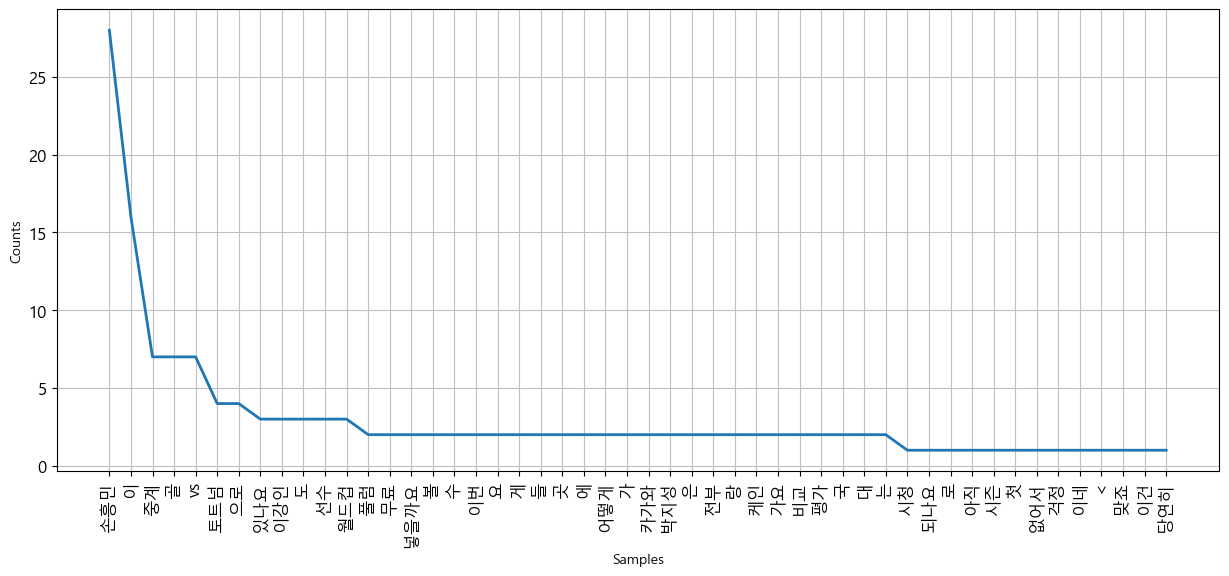

In [32]:
# Îã®Ïñ¥ Î≥Ñ Îì±Ïû• ÌöüÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

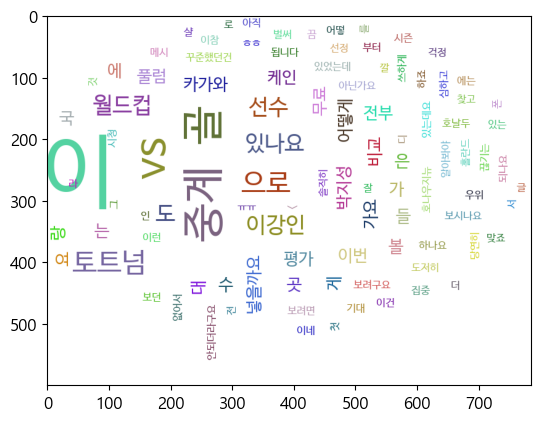

In [37]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
import pytagcloud

# ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ Ï∂îÏ∂ú
data = ko.vocab().most_common(101)
# Îã®Ïñ¥ÏôÄ Îì±Ïû• ÌöüÏàòÎ•º Í∞ÄÏßÄÍ≥† ÌÅ¨Í∏∞ÏôÄ ÏÉâÏÉÅÏùÑ ÏÑ§Ï†ï
taglist = pytagcloud.make_tags(data, maxsize=200)
# print(taglist)
for i in taglist:
    if i["tag"] == 'ÏÜêÌù•ÎØº':
        taglist.remove(i)

#ÌÉúÍ∑∏ ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
pytagcloud.create_tag_image(taglist, 'wordcloud.png', size=(900, 600), fontname='Korean', rectangular=False)

import matplotlib.pyplot
import matplotlib.image
img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

In [40]:
# Ïó∞Í¥Ä Îã®Ïñ¥ Ï∂îÏ∂ú
# !pip install gensim
from gensim.models import word2vec

lines = present_text
okt = Okt()
results = []

for line in lines:
    # ÌíàÏÇ¨Î•º Í∞ÄÏßÄÍ≥† ÏôÄÏÑú Josa, Eomi, Punctuation ÏùÑ Ï†úÍ±∞
    malist = okt.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)


ÌÜ†
Ìä∏
ÎÑòÎã§

ÌíÄ
Îüº

Ï§ë
Í≥Ñ

Î¨¥
Î£å

Ïãú
Ï≤≠

ÎêòÎã§
ÎÇò
Ïöî


ÏÜê
Ìù•
ÎØº

Í≥®

ÎÑ£Îã§

ÎÅÑÎã§
Ïöî


ÌÜ†
Ìä∏
ÎÑòÎã§

ÌíÄ
Îüº

Ï§ë
Í≥Ñ

Î¨¥
Î£å
Î°ú

Î≥º

Ïàò

ÏûàÎã§
ÎÇò
Ïöî


ÏÜê
Ìù•
ÎØº

Í≥®

ÎÑ£Îã§

ÎÅÑÎã§
Ïöî


ÏïÑ
ÏßÅ

Ïù¥
Î≤à

Ïãú
Ï¶å

Ï≤´
Í≥®
Ïù¥

ÏóÜÎã§

ÏÑúÎã§

Í±±
Ï†ï
Ïù¥
ÎÑ§
Ïöî

ÏÜê
Ìù•
ÎØº

v
s

Ïù¥
Í∞ï
Ïù∏

ÏÜê
Ìù•
ÎØº



Ïù¥
Í∞ï
Ïù∏
Ïù¥

ÎßûÎã§



Ïù¥
Í±¥

Îãπ
Ïó∞
Ìûà

Ïù¥
Í∞ï
Ïù∏
Ïù¥

Îçî

ÏûêÎã§
Ìïò



ÏÜê
Ìù•
ÎØº
Ï§ë
Í≥Ñ

Ìè∞
Ïúº
Î°ú

Î≥¥
Î†§
Íµ¨
Ïöî

ÏÜê
Ìù•
ÎØº
Ï§ë
Í≥Ñ


Îñª
Í≤å
Îì§Îã§

Î≥¥
Ïãú
ÎÇò
Ïöî



Í∑∏

Ï†Ñ

ÎäòÎã§

ÏÜê
Ìù•
ÎØº
Ï§ë
Í≥Ñ
Î•º

Î≥¥
Îçò

Í≥≥
Ïù¥

ÏûàÎã§
Ïóà
ÎäòÎã§
Îç∞

ÎÅäÎã§
Í∏∞
ÎäòÎã§

Í≤É
ÎèÑ

Ïã¨
Ìïò
Í≥†

ÎèÑ
Ï†Ä
Ìûà

Ïßë
Ï§ë
Ïù¥

Ïïà
ÎêòÎã§
Îçî

Íµ¨
Ïöî
„Ö†
„Ö†

Í∏Ä
ÏÑúÎã§

Ïù¥
Ï∞®Îã§


ÏÜê
Ìù•
ÎØº
Ï§ë
Í≥Ñ

ÍπîÎã§
ÎÅÑÎã§
Ïì∞Îã§
Ìïò
Í≤å

Î≥º

Ïàò

ÏûàÎã§
ÎäòÎã§

Í≥≥
Ïúº
Î°ú

Ï∞æÎã§
Í≥†

ÏûàÎã§
ÎäòÎã§
Îç∞
Ïöî


ÏÜê
Ìù•
ÎØº
Ï§ë
Í≥Ñ

Î≥¥
Î†§
Î©¥


Îñª
Í≤å

Ïïå
ÏïÑ
Î≥¥Îã§
Ïïº

Ìïò
ÎÇò
Ïöî


Î≤å
Ïç®Îã§
Î∂Ä
ÌÑ∞

Í∏∞
ÎåÄÎã§
Í∞ÄÎã§

ÎêòÎã§
Îãà
Î

In [60]:
data_file = 'Son.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
    data = word2vec.LineSentence(data_file)

model = word2vec.Word2Vec(data, vector_size=200, window=10,
hs=1,min_count=2, sg=1)
model.save('Son.model')
model = word2vec.Word2Vec.load("Son.model")
model.wv.most_similar(positive=['Ïªµ'])

[('Î†á', 0.17938785254955292),
 ('Ïõî', 0.13930967450141907),
 ('ÌíÄ', 0.13916337490081787),
 ('Í±¥', 0.13429564237594604),
 ('ÏßÅ', 0.1317596733570099),
 ('Í≥†', 0.12280555814504623),
 ('ÎØº', 0.11061125248670578),
 ('Ï†Ñ', 0.10829358547925949),
 ('Ïó∞', 0.10238903760910034),
 ('ÎÑ§', 0.09987125545740128)]

### tweet_temp.csv ÌååÏùºÏùò ÎÇ¥Ïö©ÏùÑ ÏùΩÏñ¥ÏÑú ÏÜêÌù•ÎØº Í¥ÄÎ†® Ïó∞Í¥Ä Í∑úÏπô Î∂ÑÏÑù

In [62]:
df = pd.read_csv("./data/tweet_temp.csv")
df.head()

created                                         tweet_text
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...
1  2019-04-01 10:52:30  RT @PerSON7a: TSÌä∏Î¶¥Î¶¨Ïò®, Ï∂ïÍµ¨Íµ≠Í∞ÄÎåÄÌëú ÏÜêÌù•ÎØº ÏÑ†Ïàò TSÏÉ¥Ìë∏ Î™®Îç∏Î°ú Í∏∞...
2  2019-04-01 10:49:33  RT @SON78PAY019: ÏÜêÌù•ÎØºÏù¥ Ïù¥ÏÅòÏßÄ~ Íπê Î∞§Í∞ôÏï†~\n\n„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã...
3  2019-04-01 10:49:03                  Í∑ÄÏó¨Ïõåüíú #ÏÜêÌù•ÎØº https://t.co/hstR1vALAf
4  2019-04-01 10:45:26  RT @mediatodaynews: Í≤ΩÎÇ®ÎèÑÎØºÏùºÎ≥¥ ‚Äú(ÌîÑÎ°úÏ∂ïÍµ¨Ïó∞ÎßπÏùÄ) Í≤ΩÍ∏∞Ïû• ÏïàÏóêÏÑú ...

In [63]:
# ÌïúÍ∏ÄÎßå Ï∂îÏ∂ú
import re
# ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ìï®Ïàò : ÌïúÍ∏Ä Ïù¥Ïô∏Ïùò Î¨∏ÏûêÎäî Ï†ÑÎ∂Ä Ï†úÍ±∞Ìï©ÎãàÎã§.
def text_cleaning(text):
    hangul = re.compile('[^ „Ñ±-„Ö£Í∞Ä-Ìû£]+') # ÌïúÍ∏ÄÏùò Ï†ïÍ∑úÌëúÌòÑÏãù
    # ÌïúÍ∏ÄÏù¥ ÏïÑÎãå Í≤ÉÏùÄ Ï†ÑÎ∂Ä '' Î°ú ÏπòÌôò
    result = hangul.sub('', text)
    return result

# ‚Äòtweet_text‚Äô ÌîºÏ≤òÏóê Ïù¥Î•º Ï†ÅÏö©
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

created                                         tweet_text  \
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...   
1  2019-04-01 10:52:30  RT @PerSON7a: TSÌä∏Î¶¥Î¶¨Ïò®, Ï∂ïÍµ¨Íµ≠Í∞ÄÎåÄÌëú ÏÜêÌù•ÎØº ÏÑ†Ïàò TSÏÉ¥Ìë∏ Î™®Îç∏Î°ú Í∏∞...   
2  2019-04-01 10:49:33  RT @SON78PAY019: ÏÜêÌù•ÎØºÏù¥ Ïù¥ÏÅòÏßÄ~ Íπê Î∞§Í∞ôÏï†~\n\n„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã...   
3  2019-04-01 10:49:03                  Í∑ÄÏó¨Ïõåüíú #ÏÜêÌù•ÎØº https://t.co/hstR1vALAf   
4  2019-04-01 10:45:26  RT @mediatodaynews: Í≤ΩÎÇ®ÎèÑÎØºÏùºÎ≥¥ ‚Äú(ÌîÑÎ°úÏ∂ïÍµ¨Ïó∞ÎßπÏùÄ) Í≤ΩÍ∏∞Ïû• ÏïàÏóêÏÑú ...   

                                             ko_text  
0                                                     
1    Ìä∏Î¶¥Î¶¨Ïò® Ï∂ïÍµ¨Íµ≠Í∞ÄÎåÄÌëú ÏÜêÌù•ÎØº ÏÑ†Ïàò ÏÉ¥Ìë∏ Î™®Îç∏Î°ú Í∏∞Ïö© Ï∂úÏ≤ò  ÌïúÍµ≠Í≤ΩÏ†ú  ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§    
2    ÏÜêÌù•ÎØºÏù¥ Ïù¥ÏÅòÏßÄ Íπê Î∞§Í∞ôÏï†„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„ÖãÎ≠ê ...  
3                                           Í∑ÄÏó¨Ïõå ÏÜêÌù•ÎØº   
4    Í≤ΩÎÇ®ÎèÑÎØºÏùºÎ≥¥ ÌîÑÎ°úÏ∂ïÍµ¨Ïó∞ÎßπÏùÄ Í≤ΩÍ∏∞Ïû• ÏïàÏóêÏÑú ÏÑ†Í±∞Ïö¥ÎèôÏùÑ ÌïòÎäî Í≤ÉÏùÄ ÏÜêÌù•ÎØºÏóêÍ≤å ÏòÅÍµ≠ ...

In [70]:
# ÌïúÍ∏Ä ÌòïÌÉúÏÜå Î∂ÑÏÑù
from konlpy.tag import Okt
from collections import Counter
# ÌïúÍµ≠Ïñ¥ ÏïΩÏãù Î∂àÏö©Ïñ¥ÏÇ¨Ï†Ñ ÏòàÏãú ÌååÏùº - https://www.ranks.nl/stopwords/korean
korean_stopwords_path = "./data/stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f: stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
# print(stopwords)

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    # ÌïúÍ∏ÄÏûê ÌÇ§ÏõåÎìúÎ•º Ï†úÍ±∞
    nouns = [noun for noun in nouns if len(noun) > 1]
    # Î∂àÏö©Ïñ¥Î•º Ï†úÍ±∞
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
df.head()

created                                         tweet_text  \
0  2019-04-01 10:55:00  Legends At New Spurs Stadium\nTottenham Hotspu...   
1  2019-04-01 10:52:30  RT @PerSON7a: TSÌä∏Î¶¥Î¶¨Ïò®, Ï∂ïÍµ¨Íµ≠Í∞ÄÎåÄÌëú ÏÜêÌù•ÎØº ÏÑ†Ïàò TSÏÉ¥Ìë∏ Î™®Îç∏Î°ú Í∏∞...   
2  2019-04-01 10:49:33  RT @SON78PAY019: ÏÜêÌù•ÎØºÏù¥ Ïù¥ÏÅòÏßÄ~ Íπê Î∞§Í∞ôÏï†~\n\n„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã...   
3  2019-04-01 10:49:03                  Í∑ÄÏó¨Ïõåüíú #ÏÜêÌù•ÎØº https://t.co/hstR1vALAf   
4  2019-04-01 10:45:26  RT @mediatodaynews: Í≤ΩÎÇ®ÎèÑÎØºÏùºÎ≥¥ ‚Äú(ÌîÑÎ°úÏ∂ïÍµ¨Ïó∞ÎßπÏùÄ) Í≤ΩÍ∏∞Ïû• ÏïàÏóêÏÑú ...   

                                             ko_text  \
0                                                      
1    Ìä∏Î¶¥Î¶¨Ïò® Ï∂ïÍµ¨Íµ≠Í∞ÄÎåÄÌëú ÏÜêÌù•ÎØº ÏÑ†Ïàò ÏÉ¥Ìë∏ Î™®Îç∏Î°ú Í∏∞Ïö© Ï∂úÏ≤ò  ÌïúÍµ≠Í≤ΩÏ†ú  ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§     
2    ÏÜêÌù•ÎØºÏù¥ Ïù¥ÏÅòÏßÄ Íπê Î∞§Í∞ôÏï†„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„ÖãÎ≠ê ...   
3                                           Í∑ÄÏó¨Ïõå ÏÜêÌù•ÎØº    
4    Í≤ΩÎÇ®ÎèÑÎØºÏùºÎ≥¥ ÌîÑÎ°úÏ∂ïÍµ¨Ïó∞ÎßπÏùÄ Í≤ΩÍ∏∞Ïû• ÏïàÏóêÏÑú ÏÑ†Í±∞Ïö¥ÎèôÏùÑ ÌïòÎäî Í≤ÉÏùÄ ÏÜêÌù•ÎØºÏóêÍ≤å ÏòÅÍµ≠ ...   

                                               nouns  
0                                                 []  
1  [Ìä∏Î¶¥, Î¶¨Ïò®, Ï∂ïÍµ¨, Íµ≠Í∞ÄÎåÄÌëú, ÏÜêÌù•ÎØº, ÏÑ†Ïàò, ÏÉ¥Ìë∏, Î™®Îç∏, Í∏∞Ïö©, Ï∂úÏ≤ò, ÌïúÍµ≠...  
2                                          [ÏÜêÌù•ÎØº, ÎßêÏîÄ]  
3                                              [ÏÜêÌù•ÎØº]  
4  [Í≤ΩÎÇ®, ÎèÑÎØº, ÏùºÎ≥¥, ÌîÑÎ°úÏ∂ïÍµ¨, Ïó∞Îßπ, Í≤ΩÍ∏∞Ïû•, ÏÑ†Í±∞Ïö¥Îèô, ÏÜêÌù•ÎØº, ÏòÅÍµ≠, Í¥ÄÏ§ë,...

### Ïó∞Í¥Ä Í∑úÏπô Î∂ÑÏÑù API ÏÇ¨Ïö©

In [72]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=28bda3fcb0cc852cd968b286e0cafc32c131059067769ab9c63c2027b6cccf68
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c4\1a\79\20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [73]:
# Í±∞Îûò ÏÉùÏÑ±
transactions = [['ÏÜêÌù•ÎØº', 'ÏãúÏÜåÏΩî'],['ÏÜêÌù•ÎØº', 'ÏºÄÏù∏'],
                ['ÏÜêÌù•ÎØº', 'ÏºÄÏù∏', 'Ìè¨Ï≤¥Ìã∞ÎÖ∏']]

# Ïó∞Í¥Ä Î∂ÑÏÑùÏùÑ ÏàòÌñâ
from apyori import apriori
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'ÏÜêÌù•ÎØº'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ÏÜêÌù•ÎØº'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'ÏãúÏÜåÏΩî'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ÏãúÏÜåÏΩî'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'ÏºÄÏù∏'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ÏºÄÏù∏'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'Ìè¨Ï≤¥Ìã∞ÎÖ∏'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Ìè¨Ï≤¥Ìã∞ÎÖ∏'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'ÏãúÏÜåÏΩî', 'ÏÜêÌù•ÎØº'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({

In [74]:
# ÏßÄÏßÄÎèÑ 0.5 Ïù¥ÏÉÅ, Ïã†Î¢∞ÎèÑ 0.6 Ïù¥ÏÉÅ, Ìñ•ÏÉÅÎèÑ 1.0 Ïù¥ÏÉÅÏù∏ Í±∞ÎûòÎßå ÌôïÏù∏
results = list(apriori(transactions, min_support=0.5, min_confidence=0.6,
             min_lift=1.0, max_length=2))

for result in results:
    print(result)


RelationRecord(items=frozenset({'ÏÜêÌù•ÎØº'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ÏÜêÌù•ÎØº'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'ÏºÄÏù∏'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ÏºÄÏù∏'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'ÏºÄÏù∏', 'ÏÜêÌù•ÎØº'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ÏºÄÏù∏', 'ÏÜêÌù•ÎØº'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'ÏÜêÌù•ÎØº'}), items_add=frozenset({'ÏºÄÏù∏'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'ÏºÄÏù∏'}), items_add=frozenset({'ÏÜêÌù•ÎØº'}), confidence=1.0, lift=1.0)])


In [77]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Îç∞Ïù¥ÌÑ∞Î•º list Î°ú Î≥ÄÌôò
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # Í≥µÎ∞± Î¨∏ÏûêÏó¥ÏùÑ Î∞©ÏßÄ
results = list(apriori(transactions, min_support=0.1, min_confidence=0.2,
                       min_lift=5, max_length=2))
for result in results:
    print(result)

RelationRecord(items=frozenset({'Íµ≠Í∞ÄÎåÄÌëúÌåÄ', 'Í≤åÏûÑ'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Í≤åÏûÑ'}), items_add=frozenset({'Íµ≠Í∞ÄÎåÄÌëúÌåÄ'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'Íµ≠Í∞ÄÎåÄÌëúÌåÄ'}), items_add=frozenset({'Í≤åÏûÑ'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'Í≤åÏûÑ', 'Í∏àÎ©îÎã¨'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Í≤åÏûÑ'}), items_add=frozenset({'Í∏àÎ©îÎã¨'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'Í∏àÎ©îÎã¨'}), items_add=frozenset({'Í≤åÏûÑ'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'Í≤åÏûÑ', 'Î™®Ïäµ'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Í≤åÏûÑ'}), items_add=frozenset({'Î™®Ïäµ'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'Î™®Ïäµ'}), items_add=frozenset({'Í≤åÏûÑ'}), confidence=1.0

In [79]:
# Í≤∞Í≥ºÎ•º DataFrame ÏúºÎ°ú Î≥ÄÌôò - 1Í∞úÏùò ÏÉÅÌíàÏùò Í≤ΩÏö∞Îäî Ï†úÍ±∞
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        # Í≤∞Í≥ºÏùò item Ïù¥Î¶ÑÏùÑ Í∞ÄÏßÄÍ≥† ÏôÄÏÑú list Î°ú ÏÉùÏÑ±
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        # ÏãúÎ¶¨Ï¶àÎ°ú Î≥ÄÌôò
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

source target   support
0  Íµ≠Í∞ÄÎåÄÌëúÌåÄ     Í≤åÏûÑ  0.142857
1     Í≤åÏûÑ    Í∏àÎ©îÎã¨  0.142857
2     Í≤åÏûÑ     Î™®Ïäµ  0.142857
3    ÏïÑÏãúÏïÑ     Í≤åÏûÑ  0.142857
4     Í≤åÏûÑ     ÏùòÏ°∞  0.142857

### ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî

In [80]:
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)
network_df.head()

             Ìä∏Î¶¥Î¶¨Ïò® Ï∂ïÍµ¨Íµ≠Í∞ÄÎåÄÌëú ÏÜêÌù•ÎØº ÏÑ†Ïàò ÏÉ¥Ìë∏ Î™®Îç∏Î°ú Í∏∞Ïö© Ï∂úÏ≤ò  ÌïúÍµ≠Í≤ΩÏ†ú  ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§    ÏÜêÌù•ÎØºÏù¥ Ïù¥ÏÅòÏßÄ Íπê Î∞§Í∞ôÏï†„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„ÖãÎ≠ê ÎßêÏîÄÌïòÏãúÎäîÏßÄ Ïïå Í±∞ Í∞ôÎã§ „Öã„Öã„Öã„Öã„Öã„ÖãÍπêÎ∞§„Öã„Öã„Öã„Öã„Öã„Öã„Ñπ„Ñ¥„Ñ¥„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã Í∑ÄÏó¨Ïõå ÏÜêÌù•ÎØº   Í≤ΩÎÇ®ÎèÑÎØºÏùºÎ≥¥ ÌîÑÎ°úÏ∂ïÍµ¨Ïó∞ÎßπÏùÄ Í≤ΩÍ∏∞Ïû• ÏïàÏóêÏÑú ÏÑ†Í±∞Ïö¥ÎèôÏùÑ ÌïòÎäî Í≤ÉÏùÄ ÏÜêÌù•ÎØºÏóêÍ≤å ÏòÅÍµ≠ Í¥ÄÏ§ëÏù¥ Ïù∏Ï¢ÖÏ∞®Î≥Ñ ÌñâÏúÑÎ•º Ìïú Í≤ÉÍ≥º Í∞ôÏùÄ Í∏âÏúºÎ°ú Î≥¥Í≥† ÏûàÎã§ Í∑∏ÎßåÌÅº Ï∂ïÍµ¨Ïû• ÎÇ¥ ÏÑ†Í±∞Ïö¥Îèô Í∑úÏ†ï ÏúÑÎ∞òÏù¥ ÏóÑÍ≤©ÌïòÎã§Îäî Ïù¥ÏïºÍ∏∞Ïù∏Îç∞Ïöî ÎÇ¥Í∞Ä ÏÑ†ÌÉùÏùÑ Î∞õÏßÄ ÏïäÏïòÎçîÎùºÎ©¥ ÏÜêÌù•ÎØºÎ≥¥Îã§ Ï∂ïÍµ¨Î•º ÏûòÌñàÏóàÏùÑÍπåÏïàÎÖïÌïòÏÑ∏Ïöî ÌÜ†Ìä∏ÎÑò Í≥®ÏàòÌå¨ Î†ô ÏäπÎ∂ÄÏÇ¨ÏûÖÎãàÎã§ Ï†úÏùº Ï¢ãÏïÑÌïòÎäî ÏÑ†ÏàòÎäî ÏÜêÌù•ÎØºÏûÖÎã§   Í≥ÑÏ†ïÏßÄÍ∏∞ Ïã§ÏàòÎ°ú ÏÇ≠Ï†úÌï¥Î≤ÑÎ†§ÏÑú Îã§Ïãú Ïò¨Î¶¨Îäî  ÌïòÎ¶¨Î≥¥ ÏÜêÌù•ÎØº ÌôçÎ≥¥Î™®Îç∏ Î∞úÌÉÅ Í∏∞ÎÖêÌï¥ÎãπÍ∏Ä  ÌïòÏã† Î∂ÑÎì§ Ï§ë 

source target   support
0  Íµ≠Í∞ÄÎåÄÌëúÌåÄ     Í≤åÏûÑ  0.142857
1     Í≤åÏûÑ    Í∏àÎ©îÎã¨  0.142857
2     Í≤åÏûÑ     Î™®Ïäµ  0.142857
3    ÏïÑÏãúÏïÑ     Í≤åÏûÑ  0.142857
4     Í≤åÏûÑ     ÏùòÏ°∞  0.142857

In [81]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)
# Ìïú Í∏ÄÏûê ÌÇ§ÏõåÎìúÎ•º Ï†úÍ±∞
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'ÏÜêÌù•ÎØº': 560, 'ÌïòÎ¶¨Î≥¥': 245, 'Ï∂ïÍµ¨': 140, 'ÏÑ†Ïàò': 140, 'Ï°∞ÌòÑÏö∞': 140, 'Ìô©ÏùòÏ°∞': 140, 'Í∏àÎ©îÎã¨': 140, 'Î™®Îç∏': 105, 'ÌïúÍµ≠': 105, 'Ïã†Ï†úÌíà': 105, 'ÏÑ†Í±∞Ïö¥Îèô': 70, 'Î≥¥Í≥†': 70, 'Í≥ÑÏ†ï': 70, 'ÏßÄÍ∏∞': 70, 'Ïã§Ïàò': 70, 'ÏÇ≠Ï†ú': 70, 'Îã§Ïãú': 70, 'ÌôçÎ≥¥': 70, 'Î∞úÌÉÅ': 70, 'Í∏∞ÎÖê': 70, 'Ìï¥Îãπ': 70, 'Ï∂îÏ≤®': 70, 'ÌÜµÌï¥': 70, 'Í≥®ÎìúÎ∞î': 70, 'Í∏∞Í∞Ñ': 70, 'Ï∂úÍµ≠': 70, 'Íµ≠Í∞ÄÎåÄÌëúÌåÄ': 70, 'ÏïÑÏãúÏïÑ': 70, 'Í≤åÏûÑ': 70, 'Î™®Ïäµ': 70, 'ÏùòÏ°∞': 70, 'ÏßÑÏßú': 70, 'Ìä∏Î¶¥': 35, 'Î¶¨Ïò®': 35, 'Íµ≠Í∞ÄÎåÄÌëú': 35, 'ÏÉ¥Ìë∏': 35, 'Í∏∞Ïö©': 35, 'Ï∂úÏ≤ò': 35, 'Í≤ΩÏ†ú': 35, 'ÎÑ§Ïù¥Î≤Ñ': 35, 'Îâ¥Ïä§': 35, 'ÎßêÏîÄ': 35, 'Í≤ΩÎÇ®': 35, 'ÎèÑÎØº': 35, 'ÏùºÎ≥¥': 35, 'ÌîÑÎ°úÏ∂ïÍµ¨': 35, 'Ïó∞Îßπ': 35, 'Í≤ΩÍ∏∞Ïû•': 35, 'ÏòÅÍµ≠': 35, 'Í¥ÄÏ§ë': 35, 'Ïù∏Ï¢ÖÏ∞®Î≥Ñ': 35, 'ÌñâÏúÑ': 35, 'Ï∂ïÍµ¨Ïû•': 35, 'Í∑úÏ†ï': 35, 'ÏúÑÎ∞ò': 35, 'Ïù¥ÏïºÍ∏∞': 35, 'ÏÑ†ÌÉù': 35, 'ÌÜ†Ìä∏ÎÑò': 35, 'Í≥®ÏàòÌå¨': 35, 'ÏäπÎ∂ÄÏÇ¨': 35, 'Ï†úÏùº': 35, 'ÏûÖÎã§': 35, 'ÏïàÎÖïÌïòÏã≠ÎãàÍπå': 35, 'Ìä∏ÏúÑÌÑ

In [83]:
# Îã®Ïñ¥ Ïù¥Î¶ÑÏùÑ nodeÎ°ú ÎπàÎèÑÏàòÎ•º nodesize Î°ú ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # ÏãúÍ∞ÅÌôîÏùò Ìé∏ÏùòÎ•º ÏúÑÌï¥ 'nodesize' 50 Ïù¥ÌïòÎäî Ï†úÍ±∞Ìï©ÎãàÎã§.
node_df.head()

node  nodesize
2    Ï∂ïÍµ¨       140
4   ÏÜêÌù•ÎØº       560
5    ÏÑ†Ïàò       140
7    Î™®Îç∏       105
10   ÌïúÍµ≠       105

In [87]:
# ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
!pip install networkx

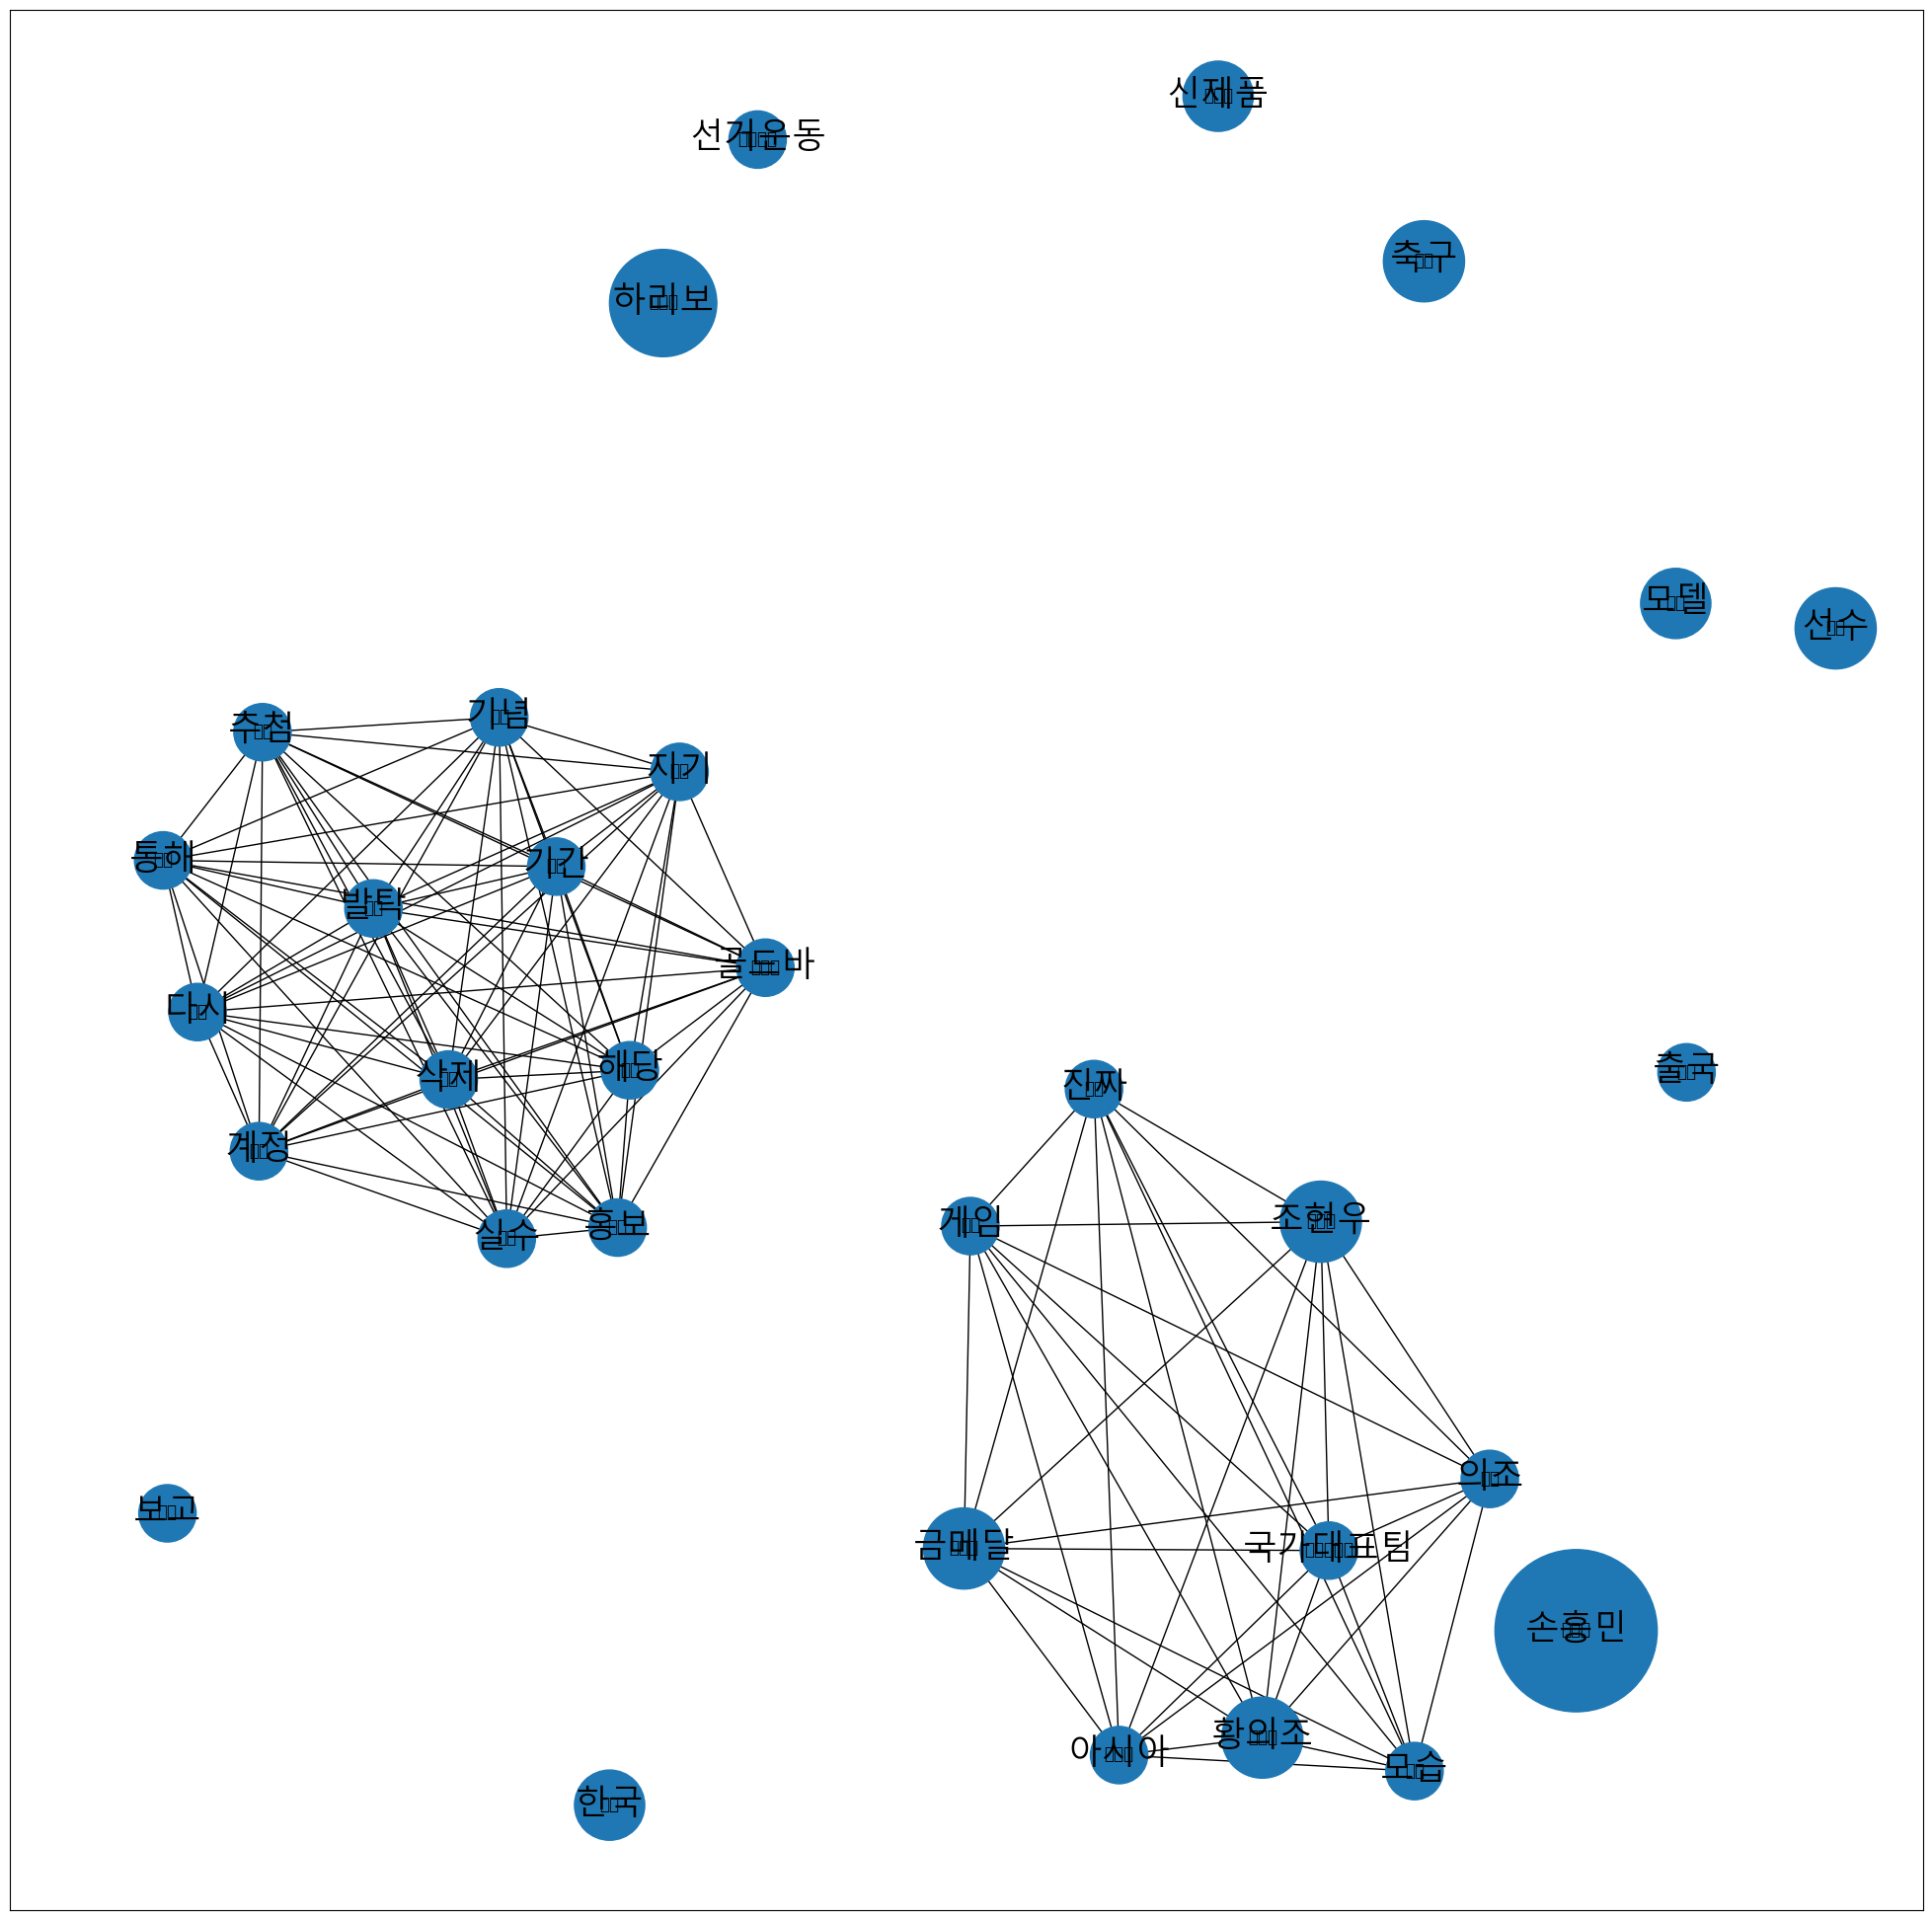

In [93]:
import networkx as nx
plt.figure(figsize=(25,25))
# networkx Í∑∏ÎûòÌîÑ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
G = nx.Graph()

# ÎÖ∏Îìú ÏÉùÏÑ±
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
# ÎÖ∏Îìú ÏÇ¨Ïù¥Ïùò Í∞ÑÏÑ†ÏùÑ ÏÉùÏÑ±
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw_networkx(G, pos=pos, node_size=sizes)

# ÌïúÍ∏ÄÏù¥ ÏûàÎäî Í≤ΩÏö∞ Ìè∞Ìä∏ ÏÑ§Ï†ï - MAC ÏùÄ AppleGothic, Windows Îäî Malgun Gothic
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)
# Í∑∏ÎûòÌîÑÎ•º Ï∂úÎ†•
ax = plt.gca()
plt.show()

In [95]:
from collections import deque
li = deque([1,2,3,4])
li.popleft()

1

## ÏΩòÌÖêÏ∏† Í∏∞Î∞òÏùò ÏòÅÌôî Ï∂îÏ≤ú ÏÑúÎπÑÏä§

In [10]:
movies =pd.read_csv('./data/tmdb/tmdb_5000_movies.csv')
print(movies.shape)
movies.info()

(4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status    

### ÌïÑÏöîÌïú ÌîºÏ≤òÎßå Ï∂îÏ∂ú

In [6]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                    'popularity', 'keywords', 'overview']]
print(movies_df[['genres','keywords']][:1])

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords  
0  [{"id": 1463, "name": "culture clash"}, {"id":...  


In [11]:
# Ïû•Î•¥ÏôÄ ÌÇ§ÏõåÎìúÎäî Î¨∏ÏûêÏó¥Ïù∏Îç∞ Ìè¨Î©ßÏù¥ python Ïùò list
# Ïù¥ Îïå ÏÇ¨Ïö©ÌïòÎäî Ìï®ÏàòÎäî eval Ïù¥ÎÇò ast Ìå®ÌÇ§ÏßÄÏùò literal_eval Ìï®Ïàò

from ast import literal_eval
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

# genres ÏôÄ keywords ÏóêÏÑú dict ÏóêÏÑú name Ïóê Ìï¥ÎãπÌïòÎäî Í∞íÎßå Ï∂îÏ∂úÌï¥ÏÑú listÎ°ú Ï∂îÏ∂ú
movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [y['name'] for y in x])

movies_df[['genres', 'keywords']][:1]

genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                            keywords  
0  [culture clash, future, space war, space colon...

In [13]:
# Ïû•Î•¥Î≥Ñ Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ïÏùÑ ÏúÑÌï¥ÏÑú Ïû•Î•¥Î•º ÌîºÏ≤ò Î≤°ÌÑ∞ ÌñâÎ†¨Î°ú ÏÉùÏÑ±
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizerÎ•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Í≥µÎ∞± Î¨∏ÏûêÎ°ú word Îã®ÏúÑÍ∞Ä Íµ¨Î∂ÑÎêòÎäî Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò.
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0.0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [12]:
movies_df['genres'].apply(lambda x : (' ').join(x))

0       Action Adventure Fantasy Science Fiction
1                       Adventure Fantasy Action
2                         Action Adventure Crime
3                    Action Crime Drama Thriller
4               Action Adventure Science Fiction
                          ...                   
4798                       Action Crime Thriller
4799                              Comedy Romance
4800               Comedy Drama Romance TV Movie
4801                                            
4802                                 Documentary
Name: genres, Length: 4803, dtype: object

In [14]:
# ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ï
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


In [15]:
# Ïú†ÏÇ¨ÎèÑ Ï†ïÎ†¨
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

# Ïó¨Í∏∞ÏÑú Ï∂úÎ†•ÎêòÎäî Í∞íÏùÄ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ ÌñâÏùò Ïù∏Îç±Ïä§

[[   0 3494  813 ... 3038 3037 2401]]


In [18]:
# Ïû•Î•¥Ïùò Ïú†ÏÇ¨ÎèÑÎ•º Ïù¥Ïö©Ìïú ÏòÅÌôî Ï∂îÏ≤ú Ìï®Ïàò
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    # Ï†úÎ™©ÏùÑ Í∞ÄÏßÄÍ≥† ÏòÅÌôî Ï∞æÍ∏∞
    title_movie = df[df['title'] == title_name]
    # ÏòÅÌôîÏùò Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    # Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ Ï∞æÍ∏∞
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1) # flatten ÎèÑ Í∞ÄÎä•
    return df.iloc[similar_indexes]

In [22]:
# ÏòÅÌôî Ï∂îÏ≤ú
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'El Mariachi',10)
similar_movies[['title', 'vote_average']]

[[2111 3972 1860 1930 2229 3591  963 1653 1133 3306]]


title  vote_average
2111  The French Connection           7.4
3972       Chicago Overcoat           6.1
1860     Kiss of the Dragon           6.4
1930             Stone Cold           5.7
2229          Machete Kills           5.3
3591             Nighthawks           6.4
963          Ninja Assassin           6.2
1653         The Last Stand           5.7
1133             15 Minutes           5.7
3306          Code of Honor           4.1

In [23]:
# ÏòÅÌôîÏùò ÌèâÏ†êÏùÑ ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï¥ÏÑú 10Í∞ú ÌôïÏù∏
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]


title  vote_average  vote_count
3519          Stiff Upper Lips          10.0           1
4247     Me You and Five Bucks          10.0           2
4045     Dancer, Texas Pop. 81          10.0           1
4662            Little Big Top          10.0           1
3992                 Sardaarji           9.5           2
2386            One Man's Hero           9.3           2
2970        There Goes My Baby           8.5           2
1881  The Shawshank Redemption           8.5        8205
2796     The Prisoner of Zenda           8.4          11
3337             The Godfather           8.4        5893

v : Í∞úÎ≥Ñ ÏòÅÌôîÏóê ÌèâÏ†êÏùÑ Ìà¨ÌëúÌïú ÌöüÏàò  
m : ÌèâÏ†êÏùÑ Î∂ÄÏó¨ÌïòÍ∏∞ ÏúÑÌïú ÏµúÏÜå Ìà¨Ìëú ÌöüÏàò  
R : Í∞úÎ≥Ñ ÏòÅÌôîÏóê ÌèâÍ∑† ÌèâÏ†ê  
C : Ï†ÑÏ≤¥ ÏòÅÌôîÏóê ÎåÄÌïú ÌèâÍ∑† ÌèâÏ†ê  

In [24]:
# Í∞ÄÏ§ë ÌèâÏ†ê Íµ¨ÌïòÍ∏∞
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


In [25]:
# Í∞ÄÏ§ë ÌèâÏ†ê Í≥ÑÏÇ∞
def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C ) 

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote', ascending=False)[:10]

title  vote_average  weighted_vote  vote_count
1881  The Shawshank Redemption           8.5       8.396052        8205
3337             The Godfather           8.4       8.263591        5893
662                 Fight Club           8.3       8.216455        9413
3232              Pulp Fiction           8.3       8.207102        8428
65             The Dark Knight           8.2       8.136930       12002
1818          Schindler's List           8.3       8.126069        4329
3865                  Whiplash           8.3       8.123248        4254
809               Forrest Gump           8.2       8.105954        7927
2294             Spirited Away           8.3       8.105867        3840
2731    The Godfather: Part II           8.3       8.079586        3338

In [26]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    # Ï†úÎ™©ÏùÑ Í∞ÄÏßÄÍ≥† ÏòÅÌôî Ï∞æÍ∏∞
    title_movie = df[df['title'] == title_name]
    # ÏòÅÌôîÏùò Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
    title_index = title_movie.index.values

    # Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ Ï∞æÏïÑÏò§Í∏∞
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
    # ÌòÑÏû¨ ÏòÅÌôîÎäî Ï†úÏô∏
    similar_indexes = similar_indexes[similar_indexes != title_index]
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

In [28]:
# ÏòÅÌôî Ï∂îÏ≤ú
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',15)
similar_movies[['title', 'vote_average', 'weighted_vote']]

title  vote_average  weighted_vote
1881     The Shawshank Redemption           8.5       8.396052
2731       The Godfather: Part II           8.3       8.079586
1847                   GoodFellas           8.2       7.976937
3866                  City of God           8.1       7.759693
1663  Once Upon a Time in America           8.2       7.657811
3887                Trainspotting           7.8       7.591009
883           Catch Me If You Can           7.7       7.557097
892                        Casino           7.8       7.423040
281             American Gangster           7.4       7.141396
4041              This Is England           7.4       6.739664
1149              American Hustle           6.8       6.717525
2582   The Place Beyond the Pines           6.8       6.670483
1243                 Mean Streets           7.2       6.626569
2839                     Rounders           6.9       6.530427
1370                           21           6.5       6.413490

### ÏïÑÏù¥ÌÖú Í∏∞Î∞ò Í∞úÏù∏ÌôîÎêú ÏòÅÌôî Ï∂îÏ≤ú

#### Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [32]:
movies = pd.read_csv('./data/movielens/movies.csv')
ratings = pd.read_csv('./data/movielens/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [34]:
# ÏòÅÌôî Ï†ïÎ≥¥ ÌôïÏù∏
# Í∞Å ÌîºÏ≤òÏùò ÏûêÎ£åÌòïÍ≥º Í≤∞Ï∏°Í∞í Ïó¨Î∂Ä Îì± ÌôïÏù∏
movies.info()
ratings.info()
# ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í∞Å ÌîºÏ≤òÏùò unique Î•º Ï∂úÎ†• - Î≤îÏ£ºÌòïÏù∏ÏßÄ ÌôïÏù∏, Î≤îÏ£ºÌòïÏù∏ Í≤ΩÏö∞ ÏàúÏÑúÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
# kaggle Ïù¥ÎÇò Dacon Í≤ΩÏßÑÎåÄÌöåÎäî ÌîºÏ≤ò Ïù¥Î¶ÑÏùÑ Ïûò ÌôïÏù∏

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [40]:
# ratings ÏàòÏ†ï
ratings = ratings[['userId', 'movieId', 'rating']]
print(ratings)

        userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]


In [41]:
# Í∞úÏù∏ÌôîÎêú ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Íµ¨ÌòÑÌï† ÎïåÎäî 
# Í∞úÏù∏ÏùÑ Ïù∏Îç±Ïä§Î°ú ÎÜìÍ≥† ÏïÑÏù¥ÌÖúÏùÑ ÌîºÏ≤òÏùò ÌòïÌÉúÎ°ú ÎßåÎì§Ïñ¥Ïïº Ìï®
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  193583  193585  193587  193609  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  

[3 rows x 9724 columns]

In [45]:
# movieId Î•º ÏòÅÌôî Ï†úÎ™©ÏúºÎ°ú Î≥ÄÍ≤Ω
# ratings ÏôÄ movies Î•º Ìï©ÏπòÍ∏∞
rating_movies = pd.merge(ratings, movies, on='movieId')
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
print(ratings_matrix.head())

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             Na

In [46]:
# NaN Í∞íÏùÑ Î™®Îëê 0 ÏúºÎ°ú Î≥ÄÌôò
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      0.0                   0.0                          0.0   
2                      0.0                   0.0                          0.0   
3                      0.0                   0.0                          0.0   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                                  0.0  ...          0.0           0.0   
2                                  0.0  ...          0.0           0.0   
3                                  0.0  ...          0.0           0.0   

title   [REC]¬≤ (2009)  [REC]¬≥ 3 G√©nesis (2012)  \
userId                                           
1                 0.0                      0.0   
2                 0.0                      0.0   
3                 0.0                      0.0   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                     0.0        
2                                                     0.0        
3                                                     0.0        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1                   0.0         0.0                             0.0   
2                   0.0         0.0                             0.0   
3                   0.0         0.0                             0.0   

title   ¬°Three Amigos! (1986)  √Ä nous la libert√© (Freedom for Us) (1931)  
userId                                                                    
1                         4.0                                        0.0  
2                         0.0                                        0.0  
3                         0.0                                        0.0  

[3 rows x 9719 columns]

In [47]:
#ÏòÅÌôî Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÏÇ∞Ï∂ú - Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï† Ìï≠Î™©Ïù¥ Ïù∏Îç±Ïä§
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId                                   1    2    3    4    5    6    7    \
title                                                                        
'71 (2014)                               0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Hellboy': The Seeds of Creation (2004)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Round Midnight (1986)                   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

userId                                   8    9    10   ...  601  602  603  \
title                                                   ...                  
'71 (2014)                               0.0  0.0  0.0  ...  0.0  0.0  0.0   
'Hellboy': The Seeds of Creation (2004)  0.0  0.0  0.0  ...  0.0  0.0  0.0   
'Round Midnight (1986)                   0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId                                   604  605  606  607  608  609  610  
title                                                                       
'71 (2014)                               0.0  0.0  0.0  0.0  0.0  0.0  4.0  
'Hellboy': The Seeds of Creation (2004)  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
'Round Midnight (1986)                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 610 columns]

In [49]:
#ÏòÅÌôîÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÏÇ∞Ï∂ú
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
# cosine_similarity() Î°ú Î∞òÌôòÎêú ÎÑòÌååÏù¥ ÌñâÎ†¨ÏùÑ ÏòÅÌôîÎ™ÖÏùÑ Îß§ÌïëÌïòÏó¨ DataFrameÏúºÎ°ú Î≥ÄÌôò
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title                                    '71 (2014)  \
title                                                 
'71 (2014)                                      1.0   
'Hellboy': The Seeds of Creation (2004)         0.0   
'Round Midnight (1986)                          0.0   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                              0.000000   
'Hellboy': The Seeds of Creation (2004)                                 1.000000   
'Round Midnight (1986)                                                  0.707107   

title                                    'Round Midnight (1986)  \
title                                                             
'71 (2014)                                             0.000000   
'Hellboy': The Seeds of Creation (2004)                0.707107   
'Round Midnight (1986)                                 1.000000   

title                                    'Salem's Lot (2004)  \
title                                                          
'71 (2014)                                               0.0   
'Hellboy': The Seeds of Creation (2004)                  0.0   
'Round Midnight (1986)                                   0.0   

title                                    'Til There Was You (1997)  \
title                                                                
'71 (2014)                                                     0.0   
'Hellboy': The Seeds of Creation (2004)                        0.0   
'Round Midnight (1986)                                         0.0   

title                                    'Tis the Season for Love (2015)  \
title                                                                      
'71 (2014)                                                           0.0   
'Hellboy': The Seeds of Creation (2004)                              0.0   
'Round Midnight (1986)                                               0.0   

title                                    'burbs, The (1989)  \
title                                                         
'71 (2014)                                         0.000000   
'Hellboy': The Seeds of Creation (2004)            0.000000   
'Round Midnight (1986)                             0.176777   

title                                    'night Mother (1986)  \
title                                                           
'71 (2014)                                                0.0   
'Hellboy': The Seeds of Creation (2004)                   0.0   
'Round Midnight (1986)                                    0.0   

title                                    (500) Days of Summer (2009)  \
title                                                                  
'71 (2014)                                                  0.141653   
'Hellboy': The Seeds of Creation (2004)                     0.000000   
'Round Midnight (1986)                                      0.000000   

title                                    *batteries not included (1987)  ...  \
title                                                                    ...   
'71 (2014)                                                          0.0  ...   
'Hellboy': The Seeds of Creation (2004)                             0.0  ...   
'Round Midnight (1986)                                              0.0  ...   

title                                    Zulu (2013)  [REC] (2007)  \
title                                                                
'71 (2014)                                       0.0      0.342055   
'Hellboy': The Seeds of Creation (2004)          0.0      0.000000   
'Round Midnight (1986)                           0.0      0.000000   

title                                    [REC]¬≤ (2009)  \
title                                                    
'71 (2014)                                

In [54]:
# ÏòÅÌôîÎ•º Í∞ÄÏßÄÍ≥† Ïú†ÏÇ¨ÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ ÏòÅÌôîÎ•º Ï∂îÏ≤ú
# ÏûêÍ∏∞ ÏûêÏã†Í≥º Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÎ©¥ 1
# Ï∂îÏ≤úÏùÑ Ìï† ÎïåÎäî ÏûêÏã†ÏùÑ Ï†úÏô∏ÌïòÍ≥† Ï∂îÏ≤ú
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

In [55]:
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr) / np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index, columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         0.070345                                 0.577855   
2         0.018260                                 0.042744   
3         0.011884                                 0.030279   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                     0.321696             0.227055   
2                     0.018861             0.000000   
3                     0.064437             0.003762   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                        0.206958                         0.194615   
2                        0.000000                         0.035995   
3                        0.003749                         0.002722   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                 0.249883              0.102542                     0.157084   
2                 0.013413              0.002314                     0.032213   
3                 0.014625              0.002085                     0.005666   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                             0.178197  ...     0.113608      0.181738   
2                             0.014863  ...     0.015640      0.020855   
3                             0.006272  ...     0.006923      0.011665   

title   [REC]¬≤ (2009)  [REC]¬≥ 3 G√©nesis (2012)  \
userId                                           
1            0.133962                 0.128574   
2            0.020119                 0.015745   
3            0.011800                 0.012225   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                0.006179        
2                                                0.049983        
3                                                0.000000        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1              0.212070    0.192921                        0.136024   
2              0.014876    0.021616                        0.024528   
3              0.008194    0.007017                        0.009229   

title   ¬°Three Amigos! (1986)  √Ä nous la libert√© (Freedom for Us) (1931)  
userId                                                                    
1                    0.292955                                   0.720347  
2                    0.017563                                   0.000000  
3                    0.010420                                   0.084501  

[3 rows x 9719 columns]

In [58]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)
# MSE Îäî Ïò§Ï∞®Î•º Ï†úÍ≥±Ìïú Í∞í
print('MSE:', get_mse(ratings_pred, ratings_matrix.values ))

MSE: 9.895354759094706


In [60]:
# Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ ÏòÅÌôîÎßåÏùÑ Í∞ÄÏßÄÍ≥† ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎäî Ìï®Ïàò
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):

    pred = np.zeros(ratings_arr.shape)

    for col in range(ratings_arr.shape[1]):

        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]

        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
    return pred

In [61]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('ÏïÑÏù¥ÌÖú Í∏∞Î∞ò Ïù∏Ï†ë TOP-20 Ïù¥ÏõÉ MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

ÏïÑÏù¥ÌÖú Í∏∞Î∞ò Ïù∏Ï†ë TOP-20 Ïù¥ÏõÉ MSE:  3.695009387428144


In [66]:
# Í≥ÑÏÇ∞Îêú ÏòàÏ∏° ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞Îäî DataFrameÏúºÎ°ú Ïû¨ÏÉùÏÑ±
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index, columns = ratings_matrix.columns)

# Ïú†Ï†Ä Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÍ≥† Ï∂îÏ≤ú
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [63]:
# Ïú†Ï†ÄÍ∞Ä Î≥¥ÏßÄ ÏïäÏùÄ ÏòÅÌôî Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±Ìï¥Ï£ºÎäî Ìï®Ïàò
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId,:]
    # ÌèâÏ†êÏù¥ 0 Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ Î≥∏ ÏòÅÌôî
    already_seen = user_rating[ user_rating > 0].index.tolist()
    movies_list = ratings_matrix.columns.tolist()  
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    return unseen_list

In [62]:
# Ïú†Ï†ÄÍ∞Ä Î≥¥ÏßÄ ÏïäÏùÄ ÏòÅÌôî Ï§ëÏóêÏÑú ÏòàÏ∏° ÌèâÏ†êÏù¥ ÎÜíÏùÄ ÏòÅÌôîÎ•º Ï∂îÏ≤úÌï¥Ï£ºÎäî Ìï®Ïàò
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies


In [64]:
# ÏÇ¨Ïö©ÏûêÍ∞Ä Î≥¥ÏßÄ ÏïäÏùÄ ÏòÅÌôî
unseen_list = get_unseen_movies(ratings_matrix, 9)

In [65]:
# ÏïÑÏù¥ÌÖú Í∏∞Î∞òÏùò Ïù∏Ï†ë Ïù¥ÏõÉ ÌòëÏóÖ ÌïÑÌÑ∞ÎßÅÏúºÎ°ú ÏòÅÌôî Ï∂îÏ≤ú
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)
# ÌèâÏ†ê Îç∞Ïù¥ÌÉÄÎ•º DataFrameÏúºÎ°ú ÏÉùÏÑ±.
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

pred_score
title                                                         
Shrek (2001)                                          0.866202
Spider-Man (2002)                                     0.857854
Last Samurai, The (2003)                              0.817473
Indiana Jones and the Temple of Doom (1984)           0.816626
Matrix Reloaded, The (2003)                           0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. H...    0.765159
Gladiator (2000)                                      0.740956
Matrix, The (1999)                                    0.732693
Pirates of the Caribbean: The Curse of the Blac...    0.689591
Lord of the Rings: The Return of the King, The ...    0.676711

### ÌñâÎ†¨ Î∂ÑÌï¥

In [71]:
from numpy.linalg import svd
A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)
print(U)
print(S)
print(VT)

U @ np.diag(S, 1)[:, 1:] @ VT

[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -1.94289029e-16  9.12870929e-01]]
[3.46410162 3.16227766]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

### ÌñâÎ†¨ Î∂ÑÌï¥Î•º Ïù¥Ïö©Ìïú Ïû†Ïû¨ ÏöîÏù∏ ÌòëÏóÖ Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ

#### ÌèâÍ∞Ä ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï¥Ï£ºÎäî Ìï®Ïàò

mean_squared_error Î•º Ï†úÍ≥µÌïòÎäîÎç∞ rmse Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥  
ÏòÅÌôîÏùò ÌèâÏ†êÏùÄ ÎåÄÎ∂ÄÎ∂Ñ 0.0 ~ 5.0 ÎòêÎäî 10.0 Ïù∏Îç∞ mse Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Ïä§ÏºÄÏùºÏù¥ Ïª§Ïßê

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞Î•º ÌñâÎ†¨ Î∂ÑÌï¥Ìïú Îç∞Ïù¥ÌÑ∞Î•º Î≥µÏõêÌïú Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÍµêÌï¥ÏÑú Ï∞®Ïù¥Î•º Íµ¨Ìï¥Ï£ºÎäî Ìï®Ïàò
# P, QÍ∞Ä ÌñâÎ†¨ Î∂ÑÌï¥Îêú Îç∞Ïù¥ÌÑ∞, non_zeros Îäî 0Ïù¥ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Ïùò Ïù∏Îç±Ïä§
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # T ÏÜçÏÑ±ÏùÄ ÌñâÎ†¨Ïùò Ï†ÑÏπò
    full_pred_matrix = np.dot(P, Q.T)

    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    return rmse


In [ ]:
# ÌñâÎ†¨ Î∂ÑÌï¥ Ìï®Ïàò - Ïã§Ï†ú Îî•Îü¨Îãù Î™®Îç∏ÏóêÏÑú Ïù¥ÎØ∏ Íµ¨ÌòÑÏù¥ ÎêòÏñ¥ÏûàÏùå
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # PÏôÄ Q Îß§Ìä∏Î¶≠Ïä§Ïùò ÌÅ¨Í∏∞Î•º ÏßÄÏ†ïÌïòÍ≥† Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Í∞ÄÏßÑ ÎûúÎç§Ìïú Í∞íÏúºÎ°ú ÏûÖÎ†•Ìï©ÎãàÎã§.
    np.random.seed(42)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    # Ï§ëÍ∞ÑÏóê Î©àÏ∂ò Í∞úÏàò ÌååÏïÖ
    break_count = 0
    
    # ÌñâÎ†¨ÏóêÏÑú Í∞íÏù¥ 0Ïù¥ ÏïÑÎãå Ïù∏Îç±Ïä§Ïùò Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±
    non_zeros = [(i, j, R[i,j]) 
                 for i in range(num_users) 
                 for j in range(num_items) if R[i,j] > 0 ]

    for step in range(steps):
        for i, j, r in non_zeros:
            # Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞íÏùò Ï∞®Ïù¥Ïù∏ Ïò§Î•ò Í∞í Íµ¨Ìï®
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # RegularizationÏùÑ Î∞òÏòÅÌïú SGD ÏóÖÎç∞Ïù¥Ìä∏ Í≥µÏãù Ï†ÅÏö©
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
    return P, Q